### Read a file that contains news 

In [1]:
filename = "cnn.txt"
with open(filename) as f:
    mytext = f.read()
mytext

'Washington (CNN)Deputy Attorney General Rod Rosenstein said Sunday anyone responsible for leaking classified information could face federal prosecution -- including people in the White House and members of Congress.\n\nAsked on "Fox News Sunday" about the possibility, Rosenstein said the Justice Department would go after "anybody who breaks the law."\n"We\'re going to devote more resources, re-evaluate our procedures and make sure we investigate every one of those leaks," Rosenstein said.\nAttorney General Jeff Sessions on Friday announced a spate of Justice Department actions to go after leaks of classified information. Among the moves Sessions announced was a Justice Department review of media subpoena rules.\nThe Justice Department under Attorney General Eric Holder in 2015 revised the rules restricting when the department could subpoena a member of the press as part of an investigation. The decision came after years of criticism of law enforcement targeting journalists.\nThe revie

## First use counter to see the most frequency words

In [2]:
import collections
count = collections.Counter(mytext.split(" "))
print(count.most_common(20))

[('the', 33), ('of', 19), ('to', 13), ('in', 12), ('a', 8), ('that', 7), ('on', 7), ('Rosenstein', 7), ('said', 6), ('Department', 6), ('Justice', 6), ('not', 6), ('he', 6), ('could', 5), ('was', 5), ('leaks', 5), ('and', 5), ('after', 5), ('', 4), ('for', 4)]


## Create a preposition list to filter a more meaningful set

In [3]:
preposition_list = "the of to in a on that on for not he was after could and it are go would those this any who might".split(" ")

filter_list = [w for w in count.most_common(100) if w[0] not in preposition_list]
filter_list[:10]

[('Rosenstein', 7),
 ('said', 6),
 ('Department', 6),
 ('Justice', 6),
 ('leaks', 5),
 ('', 4),
 ('Sessions', 4),
 ('Johnson', 4),
 ('announced', 4),
 ('said.', 4)]

### We get the above top 10 words and we can estimate the keypoints of the news.
### However, this does not contain bonding relationship between each word.
### Set this set as bench mark to compare with result of WordCloud

In [4]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(mytext)

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 399.5, 199.5, -0.5)

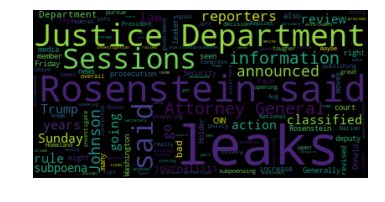

In [5]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### After comparing two results, we got several findings.
    1. "Justice Department" should be one word, we can use predefined dictionary setting 
        in order to cut the right word set.
        
    2.  "Rosenstein said" is cut as one word, which might be cause by the style of news.
        This writing skill is mean to indicate "who" declare or share whose own opinion.
        It's need to use specific word spliter for different styles of article.
        
    3.  "leaks" become the largest word in graph shows that the importance in this article,
        which might be analyzed by NLP algo in wordcloud. That algo make the rank of "leaks"
        goes up to top rank from rank 5.

## Use TextBlob to analyze sentiments of sentence and article

In [6]:
from textblob import TextBlob
blob = TextBlob(mytext)

print("Whole article sentiment: ",blob.sentiment)

textblob_polarity = [s.sentiment.polarity for s in blob.sentences]
textblob_subjectivity = [s.sentiment.subjectivity for s in blob.sentences]


Whole article sentiment:  Sentiment(polarity=0.07563025210084036, subjectivity=0.49981325863678816)


## Use Afinn to analyze sentiments of sentence and article

In [7]:
from nltk import tokenize
from afinn import Afinn
afinn = Afinn()
sentences = tokenize.sent_tokenize(mytext)
afinn_sentiment = [afinn.score(s) for s in sentences]

## Use SnowNLP to analyze sentiments of sentence and article

In [8]:
from snownlp import SnowNLP
s = SnowNLP(mytext)
print("Keywords: ",s.keywords(10))
print("==="*30)
print("Summary:  " ,s.summary(3))
snow_list = [ SnowNLP(sen).sentiments for sen in s.sentences]

Keywords:  ['a', 'Rosenstein', 'leaks', 'Department', 'Justice', 'said.', 'information', 'Johnson', 'reporters', 'department']
Summary:   ['Attorney General Jeff Sessions on Friday announced a spate of Justice Department actions to go after leaks of classified information. Among the moves Sessions announced was a Justice Department review of media subpoena rules.', 'The Justice Department under Attorney General Eric Holder in 2015 revised the rules restricting when the department could subpoena a member of the press as part of an investigation. The decision came after years of criticism of law enforcement targeting journalists.', 'While Johnson said there should be a concerted effort to go after the leakers, he also floated a note of caution to Sessions, saying the Justice Department should be careful about what precedent its actions might set in court.']


## Plot both with matplotlib

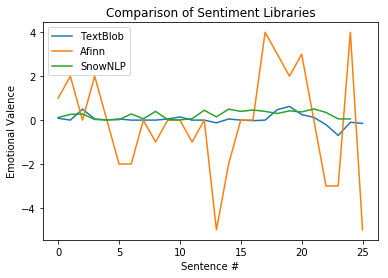

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.title("Comparison of Sentiment Libraries")
plt.plot(textblob_polarity, label = "TextBlob")
plt.plot(afinn_sentiment, label = "Afinn")
plt.plot(snow_list, label = "SnowNLP")
plt.ylabel("Emotional Valence")
plt.xlabel("Sentence #")
plt.legend(loc='best')

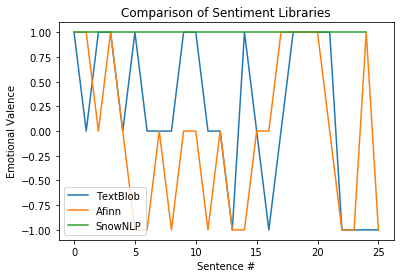

In [11]:
fig = plt.figure()
plt.title("Comparison of Sentiment Libraries")
plt.plot(sign(textblob_polarity), label = "TextBlob")
plt.plot(sign(afinn_sentiment), label = "Afinn")
plt.plot(sign(snow_list), label = "SnowNLP")
plt.ylabel("Emotional Valence")
plt.xlabel("Sentence #")
plt.legend(loc='best')